In [1]:
from pyquaternion import Quaternion
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

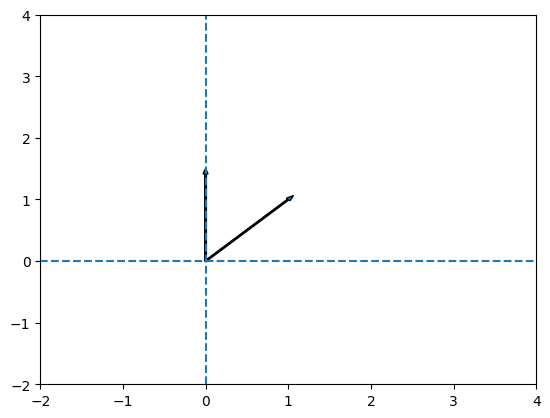

In [2]:
plt.xlim([-2, 4])
plt.ylim([-2, 4])
a = 1+1j
b = np.cos(np.pi/4)+np.sin(np.pi/4)*1j
z = a*b
plt.arrow(0, 0, a.real, a.imag, width=0.02)
plt.arrow(0, 0, z.real, z.imag, width=0.02)
plt.hlines(0, -2, 4, linestyles='--')
plt.vlines(0, -2, 4, linestyles="--")

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._Arrow3D_verts3d = xs, ys, zs
    
    def do_3d_projection(self, render=None):
        xs3d, ys3d, zs3d = self._Arrow3D_verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

(-3.0, 3.0)

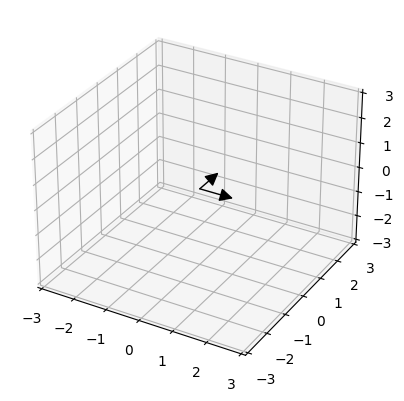

In [8]:
vector = np.array([1, 0, 0])
tmp = np.c_[np.zeros(3), vector]

q = Quaternion(angle=np.pi/2, axis=np.array([0, 0, 1]))
mat = q.rotation_matrix
vector_ = mat.dot(vector)
tmp1 = np.c_[np.zeros(3), vector_]
ax = plt.figure().add_subplot(projection='3d')
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='k', shrinkA=0, shrinkB=0)
a = Arrow3D(tmp[0], tmp[1], tmp[2], **arrow_prop_dict)
b = Arrow3D(tmp1[0], tmp1[1], tmp1[2], **arrow_prop_dict)
ax.add_artist(a)
ax.add_artist(b)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])



In [6]:
q = Quaternion(angle=np.pi/2, axis=np.array([0, 0, 1]))


In [7]:
q.rotation_matrix

array([[ 1.99673462e-16, -1.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  1.79380389e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])